### 1.0 Downloading the dataset
- utils.py has a function used to download the dataset from the kaggle website
- function takes two arguments copy_from_url and path on which the dataset needs to be downloaded
- copy_from_url is a string string identified of the dataset should be in format [owner]/[dataset-name].
- copy_from_url can be identified from the link to the dataset "https://www.kaggle.com/datasets/**muratkokludataset/pistachio-dataset**/data"

#### Insights
- no missing values
- There are 2148 samples and 29 features in the dataset
- There is 1 categorical features - ['Class']
- There are 28 numerical features - ['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity', 'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio', 'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2', 'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB', 'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB', 'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB']
- 50% of pistachio data has area less than 79905.500000 
- only 25 % of pistachio data has perimeter more than 1607.906250
- Area column follows a normal distribution
- perimeter column follows a positively skewed distribution 
- right-skewed distribution suggests that there are many pistachios with smaller perimeters (common sizes) and fewer pistachios with larger perimeters This aligns with the idea that a majority of pistachios might fall within a typical or common size range

In [1]:
# downloading the dataset from the kaggle website
import os 
from utils import download
copy_from_url = "muratkokludataset/pistachio-dataset"
path = os.path.join(os.getcwd(),"data")
download(copy_from_url, path)

### 2.0 Read the CSV file using Pandas
- read_csv module from pandas is used to read the downloaded dataset

In [2]:
import pandas as pd
from pathlib import  Path
df = pd.read_excel("data/Pistachio_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xlsx")

In [3]:
df.head()
df.isna().sum() 
# """
# find the number of missing values in a dataset using the isna() method, which returns a DataFrame of the same shape 
# as the input with True where a missing value is present and False otherwise. You can then use sum() to count the number of 
# True values in each column, giving you the count of missing values. Here's an example:
# """

Area             0
Perimeter        0
Major_Axis       0
Minor_Axis       0
Eccentricity     0
Eqdiasq          0
Solidity         0
Convex_Area      0
Extent           0
Aspect_Ratio     0
Roundness        0
Compactness      0
Shapefactor_1    0
Shapefactor_2    0
Shapefactor_3    0
Shapefactor_4    0
Mean_RR          0
Mean_RG          0
Mean_RB          0
StdDev_RR        0
StdDev_RG        0
StdDev_RB        0
Skew_RR          0
Skew_RG          0
Skew_RB          0
Kurtosis_RR      0
Kurtosis_RG      0
Kurtosis_RB      0
Class            0
dtype: int64

### 3.0 Exploring Dataset Characteristics
The following code is useful for obtaining a quick overview of the dataset, including the number of samples, number of features, and a breakdown of categorical and numerical features. It can be particularly helpful during the initial stages of data exploration and analysis.
1. Shape of the DataFrame

```python
samples, features = df.shape
print(f"There are {samples} samples and {features} features in the dataset")
```

2. Identification of Categorical and Numerical Features

```python
categorical_features = [cname for cname in df.columns if df[cname].dtype=='O']
numerical_features = [cname for cname in df.columns if df[cname].dtype!='O']
```
- Two lists, categorical_features and numerical_features, are created to store the names of categorical and numerical features, respectively.
- Categorical features are identified based on their data type being 'O' (object), while numerical features have a data type other than 'O'


In [4]:

samples, features = df.shape
print(f"There are {samples} samples and {features} features in the dataset")
categorical_features = [cname for cname in df.columns if df[cname].dtype=='O']
numerical_features = [cname for cname in df.columns if df[cname].dtype!='O']
print(f"There is {len(categorical_features)} categorical features - {categorical_features}")
print(f"There are {len(numerical_features)} numerical features - \
{numerical_features}")


There are 2148 samples and 29 features in the dataset
There is 1 categorical features - ['Class']
There are 28 numerical features - ['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity', 'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio', 'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2', 'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB', 'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB', 'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB']


`describe()` method in Pandas is used to generate descriptive statistics of a DataFrame. It provides a summary of central tendency, dispersion, and shape of the distribution of a dataset
The output of df.describe() includes the following statistics for each column:

- count: The number of non-null values (missing values are excluded).
- mean: The mean (average) of the values.
- std: The standard deviation, a measure of the amount of variation or dispersion.
- min: The minimum value in the column.
- 25%: The first quartile, or the 25th percentile.
- 50%: The median, or the 50th percentile.
- 75%: The third quartile, or the 75th percentile.
- max: The maximum value in the column.

In [5]:
df.describe()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,...,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,79950.655493,1425.971751,446.248968,238.311842,0.840219,317.919173,0.940093,85015.839851,0.716067,1.898154,...,191.995311,21.380084,22.591454,22.427056,-0.735243,-0.615580,-0.367142,3.054000,2.903015,2.940572
std,13121.737799,375.565503,32.445304,30.310695,0.048759,26.908600,0.050452,13154.919327,0.052532,0.240100,...,13.030505,3.127813,3.622222,3.926325,0.384584,0.389219,0.426964,0.733993,0.651383,0.750171
min,29808.000000,858.363000,320.344500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,...,146.787600,10.611100,11.985400,11.197100,-1.931600,-1.658200,-2.348600,1.662400,1.665500,1.522500
25%,71936.750000,1170.996250,426.508750,217.875825,0.817500,302.642850,0.919850,76467.000000,0.687000,1.736375,...,182.930675,19.253550,20.036675,19.722425,-0.990900,-0.875975,-0.645800,2.509700,2.437400,2.449425
50%,79905.500000,1262.785500,448.574750,236.416350,0.849650,318.965300,0.954150,85075.500000,0.726500,1.896250,...,192.036350,21.425100,22.523250,22.276900,-0.756600,-0.653050,-0.424550,2.941750,2.807050,2.783350
75%,89030.500000,1607.906250,468.509400,257.760150,0.875200,336.685525,0.976925,93893.500000,0.753600,2.067025,...,201.097725,23.695900,25.241900,25.140125,-0.502500,-0.405000,-0.158400,3.446500,3.247400,3.224650
max,124008.000000,2755.049100,541.966100,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,...,235.000700,30.838300,33.614600,42.756600,1.865400,2.257600,1.852100,8.890600,10.453900,11.533900


<Axes: xlabel='Perimeter', ylabel='Count'>

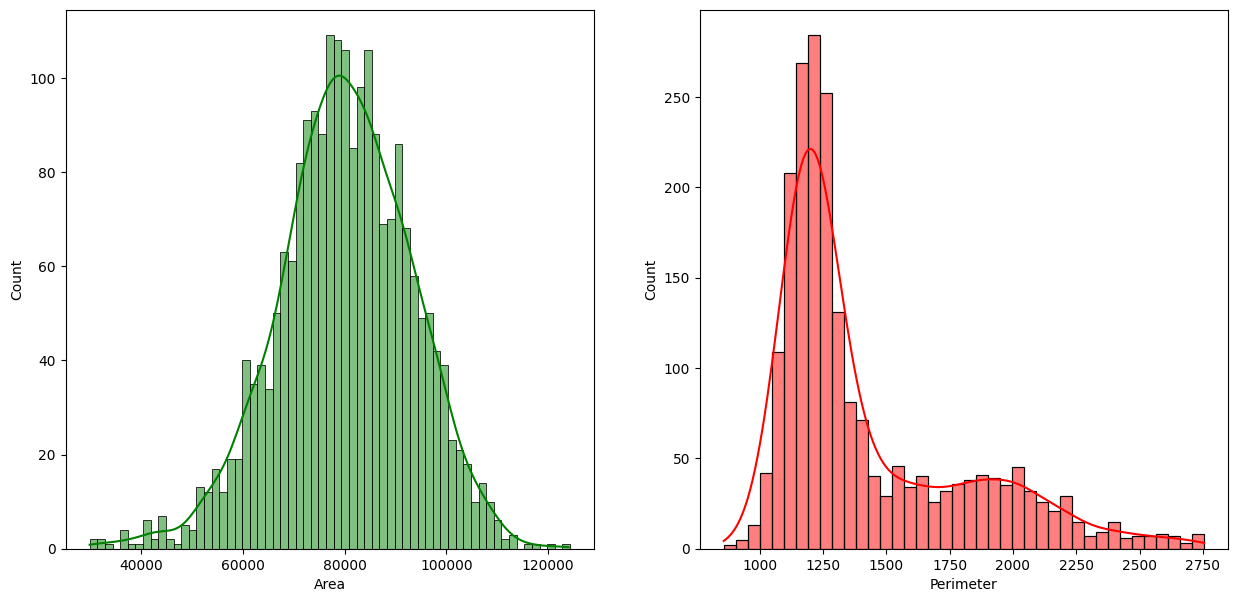

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121) 
sns.histplot(df, x="Area",bins=100, color='g', kde=True, binwidth=1500)
plt.subplot(122)
sns.histplot(df, x="Perimeter", bins=40, color='r', kde=True,)

<Axes: xlabel='Perimeter', ylabel='Count'>

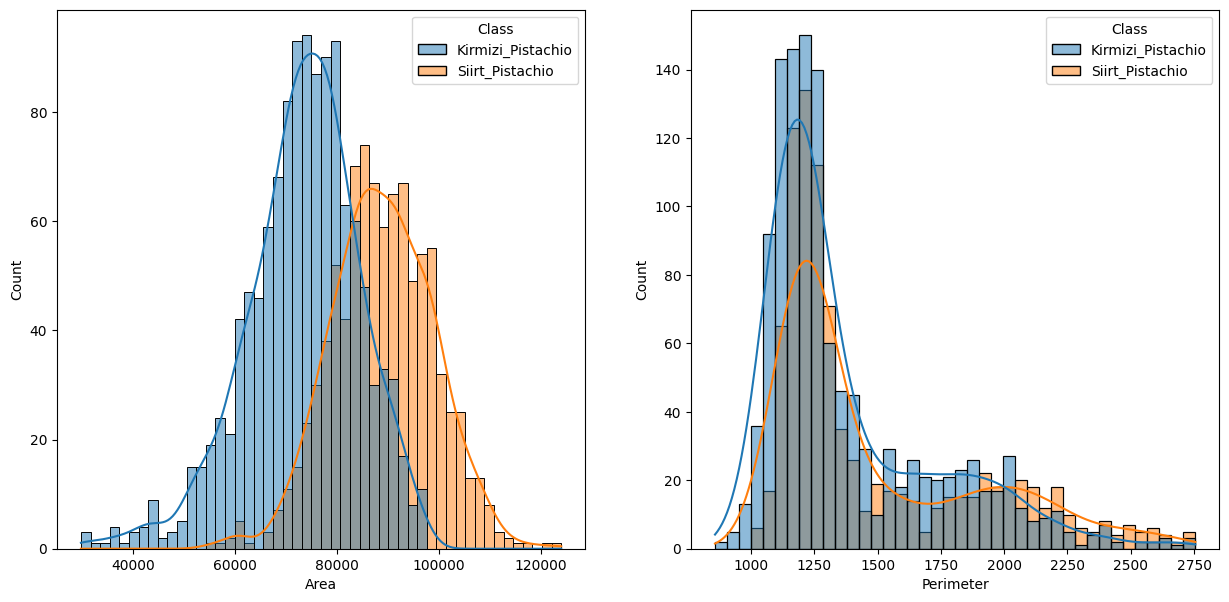

In [20]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(df, x="Area", hue="Class", bins=50, kde=True)
plt.subplot(122)
sns.histplot(df, x="Perimeter", hue="Class", bins=40, kde=True)

In [40]:
pista_types= list(df["Class"].unique())
print(pista_types)

['Kirmizi_Pistachio', 'Siirt_Pistachio']


In [39]:
df[df["Class"]==pista_types[1]]
print(df[df["Class"]==pista_types[0]]["Area"].mean())
print(df[df["Class"]==pista_types[1]]["Area"].mean())


73285.42938311688
88915.23908296943
